# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [73]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [74]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [75]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.018965419606063127


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [76]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
loss, grads = net.loss(X, y, reg=0.05)
# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865039e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555471e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017143643532923733


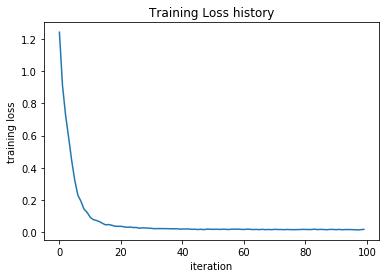

In [77]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [127]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [112]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302767
iteration 100 / 1000: loss 2.302384
iteration 200 / 1000: loss 2.297174
iteration 300 / 1000: loss 2.264413
iteration 400 / 1000: loss 2.202772
iteration 500 / 1000: loss 2.115174
iteration 600 / 1000: loss 2.118180
iteration 700 / 1000: loss 2.091518
iteration 800 / 1000: loss 1.962413
iteration 900 / 1000: loss 1.987405
Validation accuracy:  0.276


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

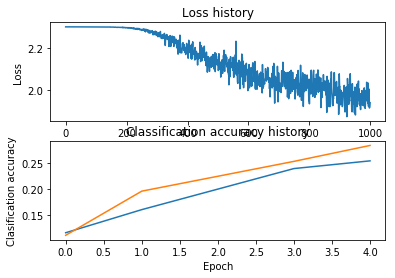

In [80]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

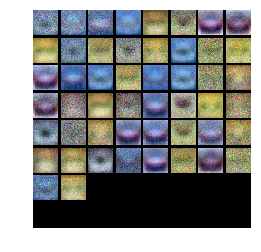

In [81]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [144]:
best_net = None # store the best model into this 
import random as rd

#To find Best learning rate
best_val=-10
for count in range(0,20):
    print('****lr test****iter',count)
    reg=0.0
    lr=10**(-5)*rd.uniform(75,90)
    input_size = 32 * 32 * 3
    hidden_size = 50
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=100,
            learning_rate=lr, learning_rate_decay=1,
            reg=reg, verbose=True)
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: %f lr: %f reg: %f lrdecay: %f'% (val_acc,lr,reg,lrdecay))
    if val_acc>best_val:
        best_val=val_acc
        best_lr=lr
print('best_lr:',best_lr)       

#To find Best reg
best_val=-10
for count in range(0,20):
    print('****reg test****iter',count)
    reg=10**rd.uniform(-4,-1)
    input_size = 32 * 32 * 3
    hidden_size = 50
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=100,
            learning_rate=best_lr, learning_rate_decay=1,
            reg=reg, verbose=True)
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: %f lr: %f reg: %f lrdecay: %f'% (val_acc,lr,reg,lrdecay))
    if val_acc>best_val:
        best_val=val_acc
        best_reg=reg

print('best_lr',best_lr)
print('best_reg',best_reg)
print('best_val',best_val)

#To find Best lrdecay
best_val=-10
for count in range(0,20):
    print('****lrdecay test****iter',count)
    lrdecay=rd.uniform(0,10)*0.01+0.9
    input_size = 32 * 32 * 3
    hidden_size = 50
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=100,
            learning_rate=best_lr, learning_rate_decay=lrdecay,
            reg=best_reg, verbose=True)
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: %f lr: %f reg: %f lrdecay: %f'% (val_acc,lr,reg,lrdecay))
    if val_acc>best_val:
        best_val=val_acc
        best_lrdecay=lrdecay

#check the results
print('best_lr',best_lr)
print('best_reg',best_reg)
print('best_val',best_val)
print('best_lrdecay',best_lrdecay)

#train the best_net
best_net = TwoLayerNet(32*32*3, 50, 10)
best_net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=100,
            learning_rate=best_lr, learning_rate_decay=best_lrdecay,
            reg=best_reg, verbose=True)
best_val_acc = (net.predict(X_val) == y_val).mean()
print('best_Validation accuracy: %f lr: %f reg: %f lrdecay: %f'% (val_acc,best_lr,best_reg,best_lrdecay))
    
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

****lr test****iter 0
iteration 0 / 3000: loss 2.302610
iteration 100 / 3000: loss 2.113772
iteration 200 / 3000: loss 1.769739
iteration 300 / 3000: loss 1.709647
iteration 400 / 3000: loss 1.641313
iteration 500 / 3000: loss 1.418756
iteration 600 / 3000: loss 1.520882
iteration 700 / 3000: loss 1.607248
iteration 800 / 3000: loss 1.578746
iteration 900 / 3000: loss 1.543274
iteration 1000 / 3000: loss 1.398719
iteration 1100 / 3000: loss 1.464168
iteration 1200 / 3000: loss 1.596106
iteration 1300 / 3000: loss 1.357540
iteration 1400 / 3000: loss 1.505403
iteration 1500 / 3000: loss 1.516597
iteration 1600 / 3000: loss 1.413445
iteration 1700 / 3000: loss 1.355528
iteration 1800 / 3000: loss 1.626826
iteration 1900 / 3000: loss 1.273374
iteration 2000 / 3000: loss 1.270370
iteration 2100 / 3000: loss 1.207758
iteration 2200 / 3000: loss 1.349576
iteration 2300 / 3000: loss 1.273389
iteration 2400 / 3000: loss 1.318708
iteration 2500 / 3000: loss 1.442770
iteration 2600 / 3000: loss 

iteration 2800 / 3000: loss 1.353332
iteration 2900 / 3000: loss 1.514736
Validation accuracy: 0.470000 lr: 0.000893 reg: 0.000000 lrdecay: 0.945273
****lr test****iter 7
iteration 0 / 3000: loss 2.302571
iteration 100 / 3000: loss 1.910699
iteration 200 / 3000: loss 1.812120
iteration 300 / 3000: loss 1.694148
iteration 400 / 3000: loss 1.549983
iteration 500 / 3000: loss 1.642592
iteration 600 / 3000: loss 1.666689
iteration 700 / 3000: loss 1.508154
iteration 800 / 3000: loss 1.631151
iteration 900 / 3000: loss 1.477821
iteration 1000 / 3000: loss 1.462478
iteration 1100 / 3000: loss 1.465742
iteration 1200 / 3000: loss 1.492613
iteration 1300 / 3000: loss 1.456150
iteration 1400 / 3000: loss 1.571715
iteration 1500 / 3000: loss 1.727299
iteration 1600 / 3000: loss 1.334433
iteration 1700 / 3000: loss 1.389904
iteration 1800 / 3000: loss 1.448831
iteration 1900 / 3000: loss 1.379169
iteration 2000 / 3000: loss 1.430226
iteration 2100 / 3000: loss 1.231616
iteration 2200 / 3000: loss

iteration 2400 / 3000: loss 1.679691
iteration 2500 / 3000: loss 1.289795
iteration 2600 / 3000: loss 1.462046
iteration 2700 / 3000: loss 1.532118
iteration 2800 / 3000: loss 1.140378
iteration 2900 / 3000: loss 1.339681
Validation accuracy: 0.491000 lr: 0.000801 reg: 0.000000 lrdecay: 0.945273
****lr test****iter 14
iteration 0 / 3000: loss 2.302581
iteration 100 / 3000: loss 1.954327
iteration 200 / 3000: loss 1.880201
iteration 300 / 3000: loss 1.695683
iteration 400 / 3000: loss 1.555507
iteration 500 / 3000: loss 1.578947
iteration 600 / 3000: loss 1.650238
iteration 700 / 3000: loss 1.473100
iteration 800 / 3000: loss 1.751507
iteration 900 / 3000: loss 1.511499
iteration 1000 / 3000: loss 1.407621
iteration 1100 / 3000: loss 1.532339
iteration 1200 / 3000: loss 1.506946
iteration 1300 / 3000: loss 1.576735
iteration 1400 / 3000: loss 1.484269
iteration 1500 / 3000: loss 1.518523
iteration 1600 / 3000: loss 1.599442
iteration 1700 / 3000: loss 1.377452
iteration 1800 / 3000: los

iteration 1900 / 3000: loss 1.292167
iteration 2000 / 3000: loss 1.435599
iteration 2100 / 3000: loss 1.563954
iteration 2200 / 3000: loss 1.283017
iteration 2300 / 3000: loss 1.689390
iteration 2400 / 3000: loss 1.302539
iteration 2500 / 3000: loss 1.153273
iteration 2600 / 3000: loss 1.388091
iteration 2700 / 3000: loss 1.406862
iteration 2800 / 3000: loss 1.239543
iteration 2900 / 3000: loss 1.156156
Validation accuracy: 0.497000 lr: 0.000780 reg: 0.000229 lrdecay: 0.945273
****reg test****iter 1
iteration 0 / 3000: loss 2.302583
iteration 100 / 3000: loss 2.038882
iteration 200 / 3000: loss 1.953749
iteration 300 / 3000: loss 1.847660
iteration 400 / 3000: loss 1.645135
iteration 500 / 3000: loss 1.673720
iteration 600 / 3000: loss 1.440917
iteration 700 / 3000: loss 1.577172
iteration 800 / 3000: loss 1.754364
iteration 900 / 3000: loss 1.511314
iteration 1000 / 3000: loss 1.599208
iteration 1100 / 3000: loss 1.379639
iteration 1200 / 3000: loss 1.425395
iteration 1300 / 3000: los

iteration 1500 / 3000: loss 1.355823
iteration 1600 / 3000: loss 1.537614
iteration 1700 / 3000: loss 1.603011
iteration 1800 / 3000: loss 1.525369
iteration 1900 / 3000: loss 1.268980
iteration 2000 / 3000: loss 1.424030
iteration 2100 / 3000: loss 1.346850
iteration 2200 / 3000: loss 1.439297
iteration 2300 / 3000: loss 1.448422
iteration 2400 / 3000: loss 1.524097
iteration 2500 / 3000: loss 1.321633
iteration 2600 / 3000: loss 1.233654
iteration 2700 / 3000: loss 1.546333
iteration 2800 / 3000: loss 1.359413
iteration 2900 / 3000: loss 1.399496
Validation accuracy: 0.504000 lr: 0.000780 reg: 0.026982 lrdecay: 0.945273
****reg test****iter 8
iteration 0 / 3000: loss 2.302593
iteration 100 / 3000: loss 2.020005
iteration 200 / 3000: loss 1.812765
iteration 300 / 3000: loss 1.754918
iteration 400 / 3000: loss 1.659236
iteration 500 / 3000: loss 1.608020
iteration 600 / 3000: loss 1.542309
iteration 700 / 3000: loss 1.810685
iteration 800 / 3000: loss 1.613682
iteration 900 / 3000: los

iteration 1100 / 3000: loss 1.324244
iteration 1200 / 3000: loss 1.575337
iteration 1300 / 3000: loss 1.446806
iteration 1400 / 3000: loss 1.374993
iteration 1500 / 3000: loss 1.441194
iteration 1600 / 3000: loss 1.191973
iteration 1700 / 3000: loss 1.634645
iteration 1800 / 3000: loss 1.397026
iteration 1900 / 3000: loss 1.404566
iteration 2000 / 3000: loss 1.400534
iteration 2100 / 3000: loss 1.479066
iteration 2200 / 3000: loss 1.318707
iteration 2300 / 3000: loss 1.389404
iteration 2400 / 3000: loss 1.255564
iteration 2500 / 3000: loss 1.493405
iteration 2600 / 3000: loss 1.225039
iteration 2700 / 3000: loss 1.380325
iteration 2800 / 3000: loss 1.140266
iteration 2900 / 3000: loss 1.309208
Validation accuracy: 0.500000 lr: 0.000780 reg: 0.016798 lrdecay: 0.945273
****reg test****iter 15
iteration 0 / 3000: loss 2.302563
iteration 100 / 3000: loss 2.055314
iteration 200 / 3000: loss 1.773665
iteration 300 / 3000: loss 1.673451
iteration 400 / 3000: loss 1.741050
iteration 500 / 3000

iteration 400 / 3000: loss 1.788066
iteration 500 / 3000: loss 1.681073
iteration 600 / 3000: loss 1.691349
iteration 700 / 3000: loss 1.491932
iteration 800 / 3000: loss 1.443361
iteration 900 / 3000: loss 1.816987
iteration 1000 / 3000: loss 1.551671
iteration 1100 / 3000: loss 1.379881
iteration 1200 / 3000: loss 1.572833
iteration 1300 / 3000: loss 1.414318
iteration 1400 / 3000: loss 1.370260
iteration 1500 / 3000: loss 1.405658
iteration 1600 / 3000: loss 1.360918
iteration 1700 / 3000: loss 1.250213
iteration 1800 / 3000: loss 1.378667
iteration 1900 / 3000: loss 1.390933
iteration 2000 / 3000: loss 1.268291
iteration 2100 / 3000: loss 1.432844
iteration 2200 / 3000: loss 1.287563
iteration 2300 / 3000: loss 1.468285
iteration 2400 / 3000: loss 1.466130
iteration 2500 / 3000: loss 1.322890
iteration 2600 / 3000: loss 1.134472
iteration 2700 / 3000: loss 1.341699
iteration 2800 / 3000: loss 1.300681
iteration 2900 / 3000: loss 1.235576
Validation accuracy: 0.481000 lr: 0.000780 r

iteration 100 / 3000: loss 1.934033
iteration 200 / 3000: loss 1.790328
iteration 300 / 3000: loss 1.774395
iteration 400 / 3000: loss 1.725780
iteration 500 / 3000: loss 1.551209
iteration 600 / 3000: loss 1.498387
iteration 700 / 3000: loss 1.526561
iteration 800 / 3000: loss 1.545770
iteration 900 / 3000: loss 1.685501
iteration 1000 / 3000: loss 1.491982
iteration 1100 / 3000: loss 1.596899
iteration 1200 / 3000: loss 1.608630
iteration 1300 / 3000: loss 1.512410
iteration 1400 / 3000: loss 1.344708
iteration 1500 / 3000: loss 1.459858
iteration 1600 / 3000: loss 1.389219
iteration 1700 / 3000: loss 1.490710
iteration 1800 / 3000: loss 1.400686
iteration 1900 / 3000: loss 1.339036
iteration 2000 / 3000: loss 1.401771
iteration 2100 / 3000: loss 1.425988
iteration 2200 / 3000: loss 1.389390
iteration 2300 / 3000: loss 1.410412
iteration 2400 / 3000: loss 1.362557
iteration 2500 / 3000: loss 1.328504
iteration 2600 / 3000: loss 1.288172
iteration 2700 / 3000: loss 1.321813
iteration 

iteration 2800 / 3000: loss 1.262687
iteration 2900 / 3000: loss 1.381419
Validation accuracy: 0.489000 lr: 0.000780 reg: 0.001272 lrdecay: 0.954704
****lrdecay test****iter 15
iteration 0 / 3000: loss 2.302567
iteration 100 / 3000: loss 2.038745
iteration 200 / 3000: loss 1.768357
iteration 300 / 3000: loss 1.766304
iteration 400 / 3000: loss 1.641881
iteration 500 / 3000: loss 1.859993
iteration 600 / 3000: loss 1.447602
iteration 700 / 3000: loss 1.501380
iteration 800 / 3000: loss 1.618523
iteration 900 / 3000: loss 1.630761
iteration 1000 / 3000: loss 1.674857
iteration 1100 / 3000: loss 1.399661
iteration 1200 / 3000: loss 1.404455
iteration 1300 / 3000: loss 1.603001
iteration 1400 / 3000: loss 1.645430
iteration 1500 / 3000: loss 1.464609
iteration 1600 / 3000: loss 1.333708
iteration 1700 / 3000: loss 1.623362
iteration 1800 / 3000: loss 1.560401
iteration 1900 / 3000: loss 1.669064
iteration 2000 / 3000: loss 1.484460
iteration 2100 / 3000: loss 1.401289
iteration 2200 / 3000

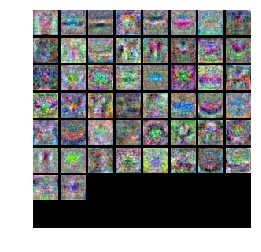

In [142]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [143]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.483
